<a href="https://colab.research.google.com/github/byteLm/Intro_Visao-Computacional_e_IA_com_TF/blob/main/Curso_SdC_Intro_IA_e_Vis%C3%A3o_Computacional_com_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução à Inteligência Artificial e Visão Computacional com TensorFlow
---
*Inteligência artificial é uma das áreas mais promissoras na atualidade. Sua base interdisciplinar, bem como sua capacidade multiagente e multiambiente possibilitam aplicações nas mais diversas áreas - trata-se de um novo paradigma para solução de problemas diversos, seja para prever valores de residências, seja para detectar e descriminar objetos em cenas sem definição algorítmica direta.*

*Este minicurso tem como objetivo introduzir os principais conceitos referentes a área de Inteligência Artificial, bem como aprofundar conceitos de Visão Computacional, perpassando pelo desenvolvimento de um classificador de dígitos e roupas, e posteriormente efetuando a detecção destes em cenas, utilizando Redes Neurais Artificiais (ANN) e TensorFlow/Keras API.*

- *Consulte o material completo em:*

In [ ]:
*GitHub/Slides

## Visão Computacional
Quando tratamos de percepção, sem dúvidas um dos sentidos mais importantes é a visão. Tarefas que para o ser humano são triviais, como distinção entre dois tipos de objetos, ou determinar a localização destes, algoriticamente é uma tarefa bem complicada. Afinal, como descrever limiares do que é ou não é uma cadeira?



Visão Computacional pode ser considerada a junção de Processamento Digital de Imagens (PDI) e Inteligência Artificial. Em seu escopo, trataremos de duas clássicas problemáticas: *classificação* e *detecção* de objetos em cenas.

### Relação entre X e Y
Tradicionalmente, quando desejamos resolver um problema utilizando programação, pensamos em algoritmos que levem a uma solução. De exemplo, podemos descrever funções do tipo:


In [ ]:
def Somar(a, b):
    return a + b


O mesmo vale para "funções mais complexas", isto é, para relacionar dois valores (X, Y), definiríamos previamente "a lei de funcionamento", e por fim obteríamos o resultado:

In [ ]:
def VezesDoisMenosTres(a):
    return (2*a)-3


Quando tratamos de apredizagem de máquina, o paradigma para solução é diferente. Enquanto tradicionalmente colocaríamos as regras para saída, iremos "mostrar exemplos" e deixar o algoritmo criá-la. Simples, não?

Para a função VezesDoisMenosTres criada anteriormente, poderíamos definir os seguintes dados como exemplo:

In [ ]:
import numpy as np
Xs = np.array([1, 2, 3, 4], dtype = float)
Ys = np.array([-1, 1, 3, 5], dtype = float)

Para encontrar a relação entre eles, iremos utilizar apenas uma camada, contendo apenas um neurônio, que recebe apenas um valor X como entrada:

In [ ]:
# Carregando bibliotecas
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Criando modelo
model = keras.Sequential(keras.layers.Dense(units=1, input_shape=[1]))

# Compilando
model.compile(optimizer='sgd', loss='mean_squared_error')

# Realizando treinamento
model.fit(Xs, Ys, epochs = 2000)

In [ ]:
# Predição
model.predict([10])

1/1 [==============================] - 0s 55ms/step


array([[16.977518]], dtype=float32)

##### Note que no exemplo acima, ao compilar o modelo, utilizamos a função de perca 'mean_squared_error' (MSE), bem como o otimizador 'Gradiente Descendente Estocástico' (SGD).

Sobre funções de custo, algumas das mais comuns incluem:

* Erro Quadrático Médio (MSE): é uma das funções de custo mais comuns e é usada em problemas de regressão. Ela calcula a média dos erros quadráticos entre as previsões do modelo e os valores alvo.

* Entropia Cruzada (CE): função de custo comumente usada em problemas de classificação. Ela calcula a distância entre a distribuição de probabilidade prevista pelo modelo e a distribuição de probabilidade real.

* Função Hinge: usada em problemas de classificação binária e multi-classe e mede o erro no caso de previsões incorretas.

* Função Logarítmica: usada em problemas de classificação binária e calcula o logaritmo da diferença entre a previsão do modelo e o valor real.

Cada uma dessas funções de custo tem suas próprias características e limitações e a escolha da função de custo adequada é uma parte importante do projeto de modelos, você pode consultar mais com este link.


Sobre otimizadores, eles são usados para atualizar os pesos do nosso modelo durante o treinamento, de forma a minimizar a função de custo. Eles são cruciais para o processo de aprendizagem. São exemplos comuns:

* Gradiente Descendente (SGD): é um dos otimizadores mais básicos e consiste em atualizar os pesos do modelo na direção oposta ao gradiente da função de custo.

* Gradiente Descendente Estocástico (SGD): é uma versão do SGD que atualiza os pesos a cada amostra de treinamento, em vez de fazê-lo após o processamento de todo o conjunto de dados de treinamento.

* Adam (Adaptive Moment Estimation): combina o SGD com a média exponencial dos gradientes anteriores, a fim de melhorar a convergência do treinamento.

* Adagrad: ajusta o ritmo de aprendizado individualmente para cada parâmetro, de forma a lidar com features de alta dimensionalidade e de pesos de diferentes magnitude.

* RMSProp: é semelhante ao Adagrad, mas tem uma correção de memória para evitar que o ritmo de aprendizado decaia rapidamente.

### Classificando dígitos



#### Contextualização
Em mesmo viés, para classificar imagens é possível utilizar abordagens clássicas de Processamento Digital de Imagens de maneira "pura". Por exemplo, é possível classificar se na figura abaixo está contido **um círculo**, apenas utilizando HoG - não de maneira simples, mas possível.

Está contido um círculo!



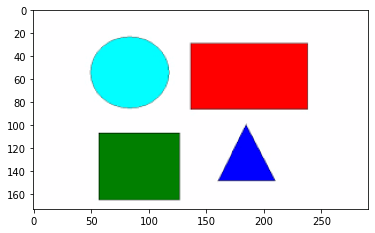

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Carregando imagem 'formas geométricas'
path = "/content/drive/MyDrive/formas-geometricas.png" # Pode utilizar outras imagens! :)
img = cv2.imread(path)
plt.imshow(img)

# Conversão para escala de cinza
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicação filtro de blur
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Aplicando detecção de bordas com Canny
edges = cv2.Canny(blur, 50, 150, apertureSize=3)

# Informa se há circulos
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)
if circles is not None:
    print("Está contido um círculo!\n")


Todavia, essa abordagem não funciona ainda para o problema de classificação de dígitos. Visualmente, como podemos diferenciar o 7 e o 2 contido abaixo? Descrever algoritmicamente, com alta modularidade para casos de testes, é *complicado*.

In [ ]:
# Carregando o dataset mnist do TensorFlow
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Plotando dois exemplos
fig, axs = plt.subplots(1,2, figsize=(20, 20))
axs[0].imshow(test_images[0]) # 7
axs[1].imshow(test_images[1]) # 2

NameError: ignored

Para tanto, utilizaremos a mesma abordagem apresentada na relação X/Y, com um pouco mais de complexidade.

#### Explicando o MNIST

MNIST é um conjunto de dados de aprendizado de máquina popular, composto por 70.000 imagens em escala de cinza de dígitos manuscritos (de 0 a 9). É amplamente utilizado como um benchmark para avaliar o desempenho de modelos de visão computacional, bem como é problema clássico do campo.


Ainda que o conjunto de dados MNIST seja simples, é possível apresentar conceitos complexos utilizando este; além do mais, o conjunto está integrado com o Keras/Tensorflow, tendo assim o seu acesso facilitado.

#### Carregando e pré-processando MNIST



Uma etapa importante, se não a mais importante, antes de efetivamente processarmos informações/dados por uma rede neural, é pré-processarmos os dados. Essa tarefa é importante por vários fatores, podemos citar:

- Evitar erros como 'estouro' da representação de ponto flutuante
- Agilizar o treinamento diminuindo a amplitude dos pesos
- Evitar viés do modelo
- Remover outliers ou ruídos

Sendo assim, não faremos diferente com o MNIST:

In [ ]:
## Inicialmente, iremos carregar o tensorflow
import tensorflow as tf
from tensorflow import keras

## Carregando o dataset
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#print("\nAntes do processamento:\n\n" + str(test_images[0]))

In [ ]:
## Iremos normalizar os dados para diminuir a amplitude dos pesos
training_images = training_images/255.0
test_images = test_images/255.0

#print("\nApós o processamento:\n\n" + str(test_images[0]))

#### Criando e compilando o modelo


In [ ]:
# Criando modelo de classificação
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), # Transforma a imagem 28x28 em um array 1D
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) # Transforma a saída anterior em probabilidade multiclasse

# Compilando modelo
model.compile(optimizer = tf.optimizers.Adam(), # A ideia básica: Adam calcula os momentos dos gradientes (isto é, a média e a variação) dos parâmetros do modelo, e utilizá-los para ajustar os pesos de maneira mais precisa.
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Treinando o modelo

In [ ]:
model.fit(training_images, training_labels, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0033 - accuracy: 0.9991
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0032 - accuracy: 0.9989
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0025 - accuracy: 0.9992
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0030 - accuracy: 0.9991
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0028 - accuracy: 0.9992
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0020 - accuracy: 0.9992
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0021 - accuracy: 0.9993
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0012 - accuracy: 0.9996
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0026 - accuracy: 0.9993
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.002

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2060 - accuracy: 0.9815


[0.20595304667949677, 0.9815000295639038]